# Quilmes - Lift analysis - Denis Trosman

The objective of this task is to create a lift analysis of a marketing campaign for different Quilmes' beer brands.

Lift is considered as the % increase of sales generated by the marketing campaign, compared to an event where this campaign hadn't been applied.

Along this notebook, a preparation of a final dataset will be done using the files that were sent, and with it, a lift calculation.

This notebook can be also found at a Github repository at https://github.com/DenisTros/Quilmes_lift

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Configs
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
import sys
sys.path.insert(0, '../')
from src.eda import analyze_df

# Read files

#### Client data

In [3]:
df_clients = pd.read_csv('../data/clients.csv')
df_channels = pd.read_csv('../data/channel_segmentation.csv')

In [4]:
analyze_df(df_clients)

Number of rows: 49458, Number of columns:3

Duplicated amount: 4

------------------------------Number of null values------------------------------
cliente_id    0
channel_id    0
region        0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id     int64
channel_id     int64
region        object
dtype: object


,cliente_id,channel_id,region
0,-1726485189,1759010777,COSTA ATLANTICA
1,-928788236,1625004744,GBA MINORISTAS
2,1641917107,1625004744,COSTA ATLANTICA
3,1273086795,1625004744,GBA MINORISTAS
4,-1708080869,1625004744,COSTA ATLANTICA


In [5]:
analyze_df(df_channels)

Number of rows: 38, Number of columns:2

Duplicated amount: 0

------------------------------Number of null values------------------------------
channel_id              0
channel_segmentation    0
dtype: int64
------------------------------Type of variables------------------------------
channel_id               int64
channel_segmentation    object
dtype: object


,channel_id,channel_segmentation
0,565501238,NO
1,1377949257,NO
2,1059805429,OTROS
3,-808273538,NO
4,-1995572528,RESTAURANTE


#### Promotions data

● El data set “coupons.csv” tiene una columna que se llama “sales_with_coupons”. Esta
columna tiene la cantidad de ventas que se generaron bajo alguna promoción efectuada
durante alguna campaña.

● Según el área de inteligencia comercial, se considera que el cliente fue participe de la
campaña, si efectúo más de 5 compras (“sales_with_coupons” > 5).

● El data set “blacklist.csv” indica los clientes que no hay que considerar en el estudio por
motivos varios.

In [6]:
df_coupons = pd.read_csv('../data/coupons.csv')
df_blacklist = pd.read_csv('../data/blacklist.csv')

In [7]:
analyze_df(df_coupons)

Number of rows: 805757, Number of columns:5



Duplicated amount: 1

------------------------------Number of null values------------------------------
cliente_id            0
business              0
brand                 0
yearmonth             0
sales_with_coupons    0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id             int64
business              object
brand                 object
yearmonth              int64
sales_with_coupons     int64
dtype: object


,cliente_id,business,brand,yearmonth,sales_with_coupons
0,-1133775360,CZA,brahma_dorada,202307,53
1,-2013629997,CZA,andes,202304,483
2,-1623564940,CZA,quilmes,202310,41
3,2137524281,CZA,quilmes,202212,1
4,-301975142,CZA,doble_malta,202210,2


In [8]:
analyze_df(df_blacklist)

Number of rows: 5937, Number of columns:1

Duplicated amount: 0

------------------------------Number of null values------------------------------
cliente_id    0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id    int64
dtype: object


,cliente_id
0,2076569343
1,486609981
2,-2133238226
3,1501782976
4,-1672885383


#### Sales data

In [9]:
df_sales_2022_1 = pd.read_csv('../data/sales_2022_sementre_1.csv')
df_sales_2022_2 = pd.read_csv('../data/sales_2022_semestre_2.csv')
df_sales_2023_1 = pd.read_csv('../data/sales_2023_semestre_1.csv')

In [10]:
analyze_df(df_sales_2022_1)

Number of rows: 588683, Number of columns:5



Duplicated amount: 0

------------------------------Number of null values------------------------------
cliente_id    0
business      0
brand         0
sales         0
yearmonth     0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id      int64
business       object
brand          object
sales         float64
yearmonth       int64
dtype: object


,cliente_id,business,brand,sales,yearmonth
0,1690894282,CZA,quilmes,1.82,202201
1,-985525432,CZA,brahma,0.74,202201
2,-674489716,CZA,brahma,4.55,202201
3,1026124970,CZA,brahma,1.26,202201
4,-2030441626,CZA,quilmes,0.20,202201


In [11]:
analyze_df(df_sales_2022_2)

Number of rows: 613864, Number of columns:5



Duplicated amount: 0

------------------------------Number of null values------------------------------
cliente_id    0
business      0
brand         0
sales         0
yearmonth     0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id      int64
business       object
brand          object
sales         float64
yearmonth       int64
dtype: object


,cliente_id,business,brand,sales,yearmonth
0,-1488116429,CZA,quilmes,290.57,202211
1,-1833555306,CZA,brahma,1.59,202211
2,-1369064580,CZA,quilmes,0.73,202211
3,2008344780,CZA,quilmes,0.73,202211
4,647173935,CZA,andes_origen,0.34,202211


In [12]:
analyze_df(df_sales_2023_1)

Number of rows: 571918, Number of columns:5

Duplicated amount: 0

------------------------------Number of null values------------------------------
cliente_id    0
business      0
brand         0
sales         0
yearmonth     0
dtype: int64
------------------------------Type of variables------------------------------
cliente_id      int64
business       object
brand          object
sales         float64
yearmonth       int64
dtype: object


,cliente_id,business,brand,sales,yearmonth
0,883821370,CZA,quilmes,3.24,202303
1,1602484641,CZA,brahma,80.11,202303
2,-124654407,CZA,quilmes,1.02,202303
3,2095908164,CZA,quilmes,14.53,202303
4,-1143586715,CZA,quilmes,0.15,202303


# Filters and unification

Delete duplicated values from clients (4) and coupons (1) datasets

In [13]:
df_clients.drop_duplicates(inplace=True)
df_coupons.drop_duplicates(inplace=True)

Datasets have no null values

Delete clients in blacklist: 1040 removed

In [14]:
df_clients = df_clients.merge(df_blacklist,on='cliente_id',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

Add channel name. Even though there are clients with more than one channel segmentation, those duplicates won't be removed.

In [15]:
df_clients = df_clients.merge(df_channels, on='channel_id',how='left')

Filter 3 needed channels

In [16]:
channels_list = ['TRADICIONAL','AUTOSERVICIOS','KIOSCOS']

In [17]:
df_clients = df_clients[df_clients.channel_segmentation.isin(channels_list)]

In [18]:
df_clients.shape

(38326, 4)

In [19]:
df_clients.head()

,cliente_id,channel_id,region,channel_segmentation
1,-928788236,1625004744,GBA MINORISTAS,TRADICIONAL
2,1641917107,1625004744,COSTA ATLANTICA,TRADICIONAL
3,1273086795,1625004744,GBA MINORISTAS,TRADICIONAL
4,-1708080869,1625004744,COSTA ATLANTICA,TRADICIONAL
5,108603926,870267989,GBA MINORISTAS,KIOSCOS


Create campaing atribute for lift - Coupons dataframe

In [20]:
df_coupons['campaign'] = [1 if x>5 else 0 for x in df_coupons.sales_with_coupons]

In [21]:
df_coupons.campaign.value_counts(normalize=True)

campaign
0   0.68
1   0.32
Name: proportion, dtype: float64

Merge with clients dataset

In [22]:
df = df_coupons.merge(df_clients,on='cliente_id',how='left').dropna()

Number of rows drops because we have implicitly applied the channels and blacklist filters

In [23]:
df.shape

(128013, 9)

There's only CZA products

In [24]:
df.business.unique()

array(['CZA'], dtype=object)

In [25]:
df.drop(columns=['channel_id'],inplace=True) # No longer need the channel code

Combine with sales data from 2023 onwards

In [26]:
df = df[df.yearmonth > 202300]

There are some values from the second semester of 2023, while the sales file should only have from the first semester. We'll ignore this for this exercise, but this should be revised.

In [27]:
df.yearmonth.value_counts()

yearmonth
202309    12089
202308    11483
202305     9145
202310     8348
202304     8332
202307     7758
202303     7591
202306     7355
202302     5464
202301     4506
Name: count, dtype: int64

In [28]:
df = df.merge(df_sales_2023_1,on=['cliente_id','yearmonth','brand','business'])

In [29]:
df.shape

(26316, 9)

In [30]:
df.head()

,cliente_id,business,brand,yearmonth,sales_with_coupons,campaign,region,channel_segmentation,sales
0,780479776,CZA,quilmes,202304,314,1,PATAGONIA,TRADICIONAL,5.34
1,-593571610,CZA,andes_origen,202301,17,1,CENTRAL,AUTOSERVICIOS,3.10
2,-1460380897,CZA,otras,202305,10,1,LITORAL,TRADICIONAL,0.20
3,1869960884,CZA,quilmes,202305,52,1,GBA MINORISTAS,AUTOSERVICIOS,2.82
4,1779836608,CZA,stella_artois,202304,21,1,LITORAL,AUTOSERVICIOS,6.65


Separate DF in 3 channels

In [31]:
df_tradicional = df[df.channel_segmentation == 'TRADICIONAL'].copy()
df_autoservicio = df[df.channel_segmentation == 'AUTOSERVICIOS'].copy()
df_kiosco = df[df.channel_segmentation == 'KIOSCOS'].copy()

In [32]:
df_tradicional.shape, df_autoservicio.shape, df_kiosco.shape

((12376, 9), (10904, 9), (3036, 9))

### Combine with sales data

Assumptions:

- Lift should be calculated considering each brand as a different product
- At least 3 months of data should be present in 2023 for each client-brand, but there may be cases where months are not consecutive. This is only a warning, but would be a next step to make an additional filter of only 3 consecutive months.

We only need to consider those who have more than 2 months of data in 2023.

To achieve this, we count the number of months by client-brand, and then remove those with a lower count than 3.

In [33]:
def filter_2023_months(data):
    """ Filter cases with less than 3 months of 2023 data """

    data['months_count_by_brand'] = data.groupby(['cliente_id','brand'])['yearmonth'].transform('count')

    data = data[data.months_count_by_brand >= 3]

    data.drop(columns=['months_count_by_brand'],inplace = True)

    return data

In [34]:
df_tradicional, df_autoservicio, df_kiosco = [filter_2023_months(data) for data in [df_tradicional, df_autoservicio, df_kiosco]]

In [35]:
df_tradicional.shape, df_autoservicio.shape, df_kiosco.shape

((5851, 9), (6742, 9), (1272, 9))

Confirm that months distribution is similar between groups, to avoid seasonality. Distribution seems similar among groups for all channels.

In [36]:
def plot_months(df):
    """ Plot distribution of months """

    data = df.groupby(['yearmonth','campaign']).agg(count = ('brand','count')).reset_index().sort_values('campaign')
    data['yearmonth'] = pd.to_datetime(data['yearmonth'], format='%Y%m').dt.strftime('%Y-%m')
    data['normalized_count'] = data.groupby('campaign')['count'].transform(lambda x: x / x.sum())

    # Crear el gráfico de barras
    plt.figure(figsize=(6,5))
    sns.barplot(data=data, x='yearmonth', y='normalized_count', hue='campaign',estimator=sum)
    plt.title('Count by Campaign over Months')
    plt.xlabel('Year-Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Campaign', loc='upper left')
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

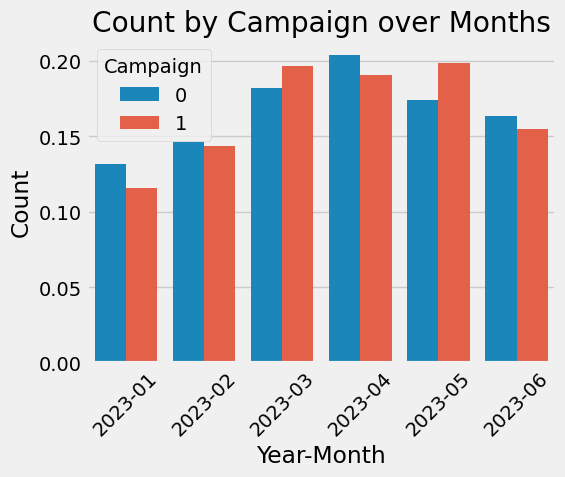

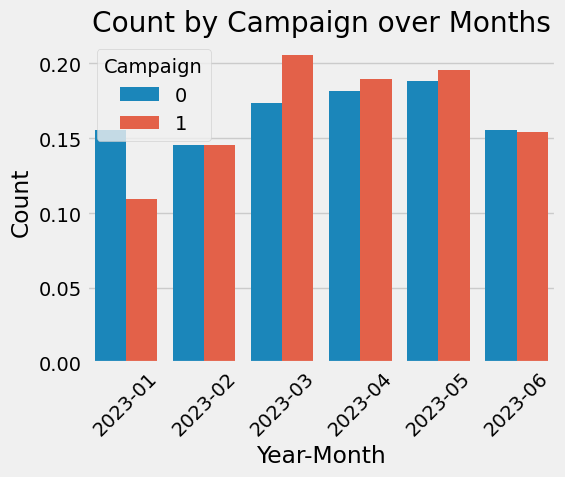

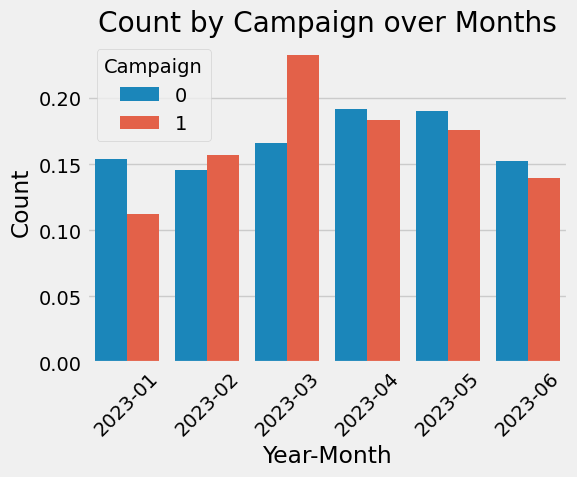

(None, None, None)

In [37]:
plot_months(df_tradicional), plot_months(df_autoservicio), plot_months(df_kiosco)

Sales' average amount is higher for campaigns for all channels

In [38]:
for data in [df_tradicional,df_autoservicio,df_kiosco]:
    name =[x for x in globals() if globals()[x] is data][0]
    print(name)
    print(data.groupby('campaign').agg(avg_sale = ('sales','mean'), count=('campaign','count')))

df_tradicional
          avg_sale  count
campaign                 
0             1.43   2805
1             2.38   3046
df_autoservicio
          avg_sale  count
campaign                 
0             2.86   2981
1             4.58   3761
df_kiosco
          avg_sale  count
campaign                 
0             1.23    584
1             1.69    688


## Create experiment and control groups

In [39]:
def create_groups(data, columna_campaña):
    data_exp = data[data[columna_campaña] == 1]
    data_control = data[data[columna_campaña] == 0]
    return data_exp, data_control

In [40]:
df_t_exp, df_t_control = create_groups(df_tradicional, 'campaign')
df_a_exp, df_a_control = create_groups(df_autoservicio, 'campaign')
df_k_exp, df_k_control = create_groups(df_kiosco, 'campaign')

## Calculate lift

In [41]:
def calculate_lift(control,exp):
    """ Formula for lift """

    a=np.mean(control.sales)
    b=np.mean(exp.sales)

    return (b-a)/a

In [42]:
from scipy.stats import ttest_ind

In [43]:
lift_dict = {'channel':['Tradicional','Autoservicio','Kioscos']
                ,
            'Lift': [calculate_lift(df_t_control,df_t_exp),
            calculate_lift(df_a_control, df_a_exp),
            calculate_lift(df_k_control,df_k_exp)],
            'T-test P value': [ttest_ind(df_t_control.sales, df_t_exp.sales, equal_var=False)[1],
                               ttest_ind(df_a_control.sales, df_a_exp.sales, equal_var=False)[1],
                               ttest_ind(df_k_control.sales, df_k_exp.sales, equal_var=False)[1]]}

In [44]:
lift_table = pd.DataFrame(lift_dict)

In [45]:
lift_table

,channel,Lift,T-test P value
0,Tradicional,0.67,0.00
1,Autoservicio,0.60,0.00
2,Kioscos,0.37,0.00


p-values are lower than 0.05, we can confirm that sales average is different between the control and experiment groups

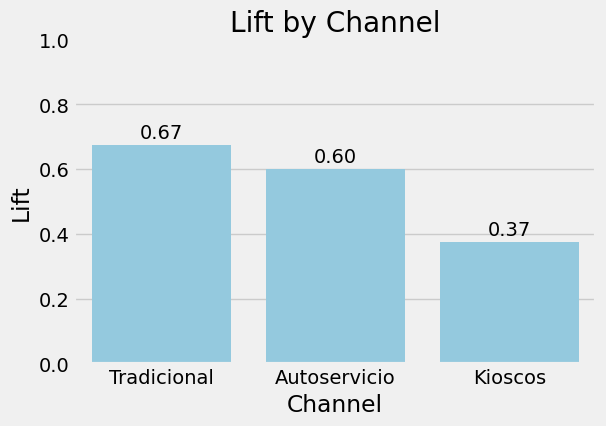

In [46]:
plt.figure(figsize=(6, 4))
sns.barplot(data=lift_table, x='channel', y='Lift', color='skyblue')
plt.title('Lift by Channel')
plt.xlabel('Channel')
plt.ylabel('Lift')
plt.ylim(0, 1)

for index, value in enumerate(lift_table['Lift']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()